In [2]:
import astropy 
import numpy as np
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy.ma as ma
import scipy
from scipy import constants
import scipy.integrate as integrate
from astropy.utils import data
from astropy.utils.data import download_file
from astropy import units as u


In [2]:
pip install spectral_cube

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/python/3.7.3/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from spectral_cube import SpectralCube

In [4]:
hdul = fits.open('/home/student04/Downloads/B1/B1_NH3_11_all_rebase3_trim.fits')

In [5]:
image_data = hdul[0].data
hdul[0].data.shape

(762, 329, 317)

In [6]:
hdul.info()
#dimensions: (231,412,762)

Filename: /home/student04/Downloads/B1/B1_NH3_11_all_rebase3_trim.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (317, 329, 762)   float64   


In [7]:
#size(deg)
NAXIS1 = hdul[0].header['NAXIS1']
NAXIS2 = hdul[0].header['NAXIS2']
print(NAXIS1,NAXIS2)
#pixel scale
CDELT1 = hdul[0].header['CDELT1']
CDELT2 = hdul[0].header['CDELT2']
print(CDELT1,CDELT2)
#angular resolution
BMAJ = hdul[0].header['BMAJ']
print(BMAJ)
#frequency resolution
CDELT3 = hdul[0].header['CDELT3']
print(CDELT3)

317 329
-0.0024440485689343 0.0024440485689343
0.008554169991270138
5722.0458984375


In [8]:
from astropy import units as u
def convert_pc(x):
    x = x*np.pi/180
    s = (290.0*u.parsec)*x
    return s
def convert_au(x):
    x = x*np.pi/180
    s = 290.0*x
    s = (s*u.pc).to(u.au)
    return s
#map size 
print('NAXIS1:',convert_pc(NAXIS1),'NAXIS2:',convert_pc(NAXIS2))
print('NAXIS1:',convert_au(NAXIS1),'NAXIS2:',convert_au(NAXIS2))
#pixel scale
print(convert_pc(CDELT1),convert_pc(CDELT2))
print(convert_au(CDELT1),convert_au(CDELT2))
#angular resolution
print(convert_pc(BMAJ),convert_au(BMAJ))

NAXIS1: 1604.4811813583872 pc NAXIS2: 1665.2186393277898 pc
NAXIS1: 330947999.9974071 AU NAXIS2: 343475999.9973089 AU
-0.012370441435902149 pc 0.012370441435902149 pc
-2551.586705947418 AU 2551.586705947418 AU
0.04329654502565797 pc 8930.553470816056 AU


In [9]:
#Problem3
sigma = np.zeros((329,317))
i = 0
j = 0    
for i in range(317):
    for j in range (329):
        s = np.nanstd(image_data[:,j,i])
        sigma[(j,i)] = s
        



/opt/python/3.7.3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


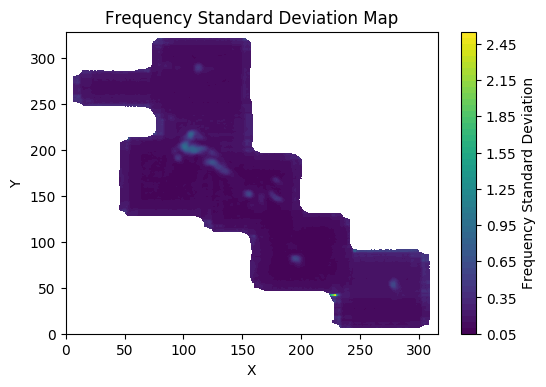

In [10]:
i = np.arange(0,317,1)
j = np.arange(0,329,1)
X,Y = np.meshgrid(i,j)
plt.figure(dpi=100)
plt.contourf(X,Y,sigma,levels=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Frequency Standard Deviation Map")
plt.colorbar(label="Frequency Standard Deviation",)
plt.show()

In [11]:
noise = np.zeros((329,317))
i = 0
j = 0    
for i in range(317):
    for j in range (329):
        list1 = np.array(image_data[0:84,j,i]).tolist()
        list2 = np.array(image_data[132:248,j,i]).tolist()
        list3 = np.array(image_data[524:624,j,i]).tolist()
        list4 = np.array(image_data[674:762,j,i]).tolist()
        final = list1 + list2 + list3 + list4
        mask = np.array(final)
        s = np.nanstd(mask)
        noise[(j,i)]=s

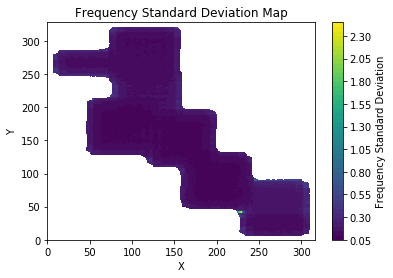

In [12]:
plt.contourf(X,Y,noise,levels=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Frequency Standard Deviation Map")
plt.colorbar(label="Frequency Standard Deviation",)
plt.show()

mean: 0.1360548859333581
median: 0.1168413820344136


'\nBoth the mean and the median seem to be fairly good representations of the overall noise level\nif we omit the emission line regions.\n'

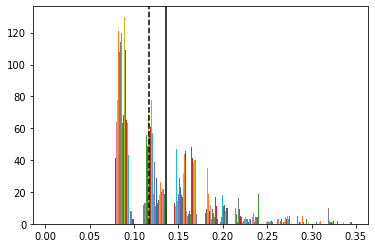

In [13]:
#Problem5
plt.hist(noise,bins=10,range=(0.0,0.35))
plt.axvline(np.nanmean(noise),color='k',linestyle='solid')
plt.axvline(np.nanmedian(noise),color='k',linestyle='dashed')
print('mean:',np.nanmean(noise))
print('median:',np.nanmedian(noise))

'''
Both the mean and the median seem to be fairly good representations of the overall noise level
if we omit the emission line regions.
'''


In [16]:
cube_raw = SpectralCube.read(hdul)

In [17]:
print(cube_raw)

SpectralCube with shape=(762, 329, 317):
 n_x:    317  type_x: RA---TAN  unit_x: deg    range:    52.724757 deg:   53.629836 deg
 n_y:    329  type_y: DEC--TAN  unit_y: deg    range:    30.627552 deg:   31.429172 deg
 n_s:    762  type_s: FREQ      unit_s: Hz     range: 23691862425.288 Hz:23696216902.217 Hz


In [18]:
cube = cube_raw.with_spectral_unit(u.km/u.s,velocity_convention='radio')

In [19]:
print(cube)

SpectralCube with shape=(762, 329, 317):
 n_x:    317  type_x: RA---TAN  unit_x: deg    range:    52.724757 deg:   53.629836 deg
 n_y:    329  type_y: DEC--TAN  unit_y: deg    range:    30.627552 deg:   31.429172 deg
 n_s:    762  type_s: VRAD      unit_s: km / s  range:      -21.780 km / s:      33.315 km / s


In [21]:
moment_0=cube.moment(order=0)

In [ ]:
pip install aplpy

INFO: Auto-setting vmin to -3.962e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.324e+01 [aplpy.core]


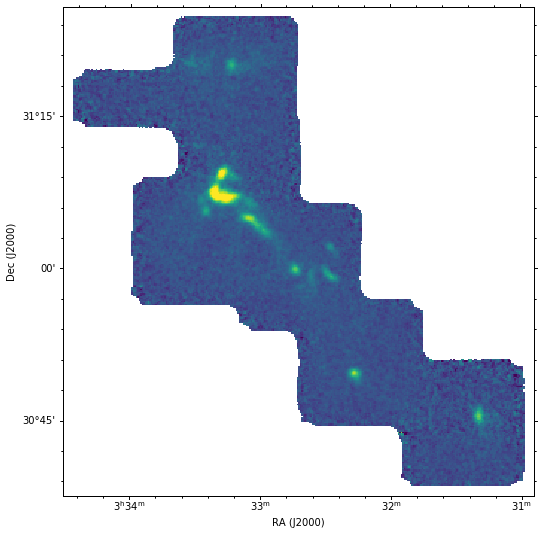

In [41]:
import aplpy
f = aplpy.FITSFigure(moment_0.hdu)
f.show_colorscale()

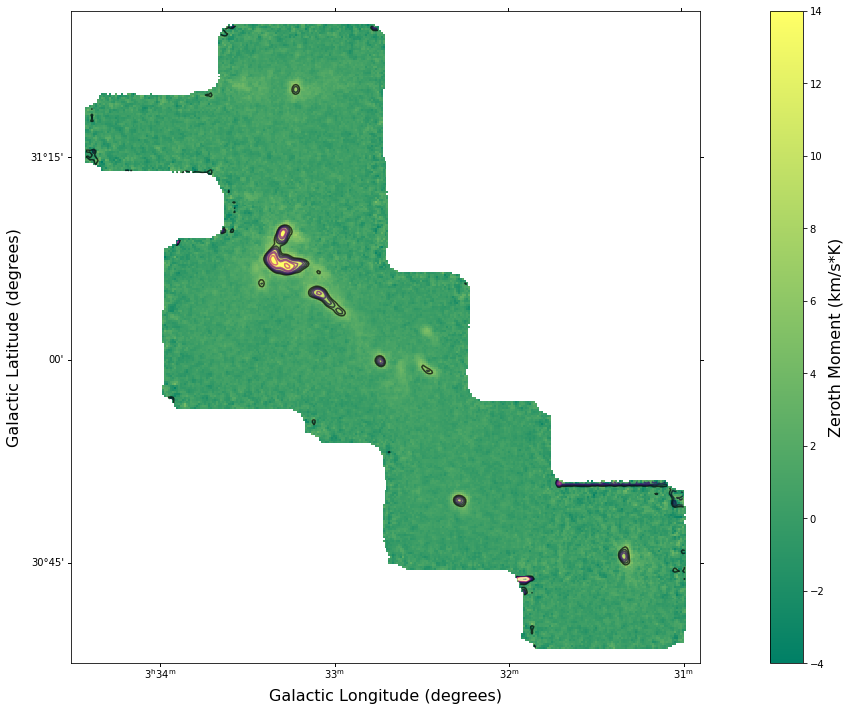

In [36]:
mu = np.nanmedian(noise)
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111,projection = moment_0.wcs)
i= ax.imshow(moment_0.hdu.data,cmap = 'summer',vmin=-4,vmax=14)
ax.set_xlabel("Galactic Longitude (degrees)", fontsize=16)
ax.set_ylabel("Galactic Latitude (degrees)", fontsize=16)
cbar = plt.colorbar(i, pad=.07)
cbar.set_label('Zeroth Moment (km/s*K)', size=16)
levels = (3*mu,3.5*mu,4.0*mu,4.5*mu,5.5*mu,6.0*mu,7.0*mu,8.5*mu,10*mu,10.5*mu) 
ax.contour(sigma,alpha=0.7,cmap='magma',levels=levels)